# Lecture 73: Building a Simple CNN for Image Classification

This notebook demonstrates how to build a Convolutional Neural Network (CNN) using Keras and TensorFlow to classify images from the CIFAR-10 dataset. CIFAR-10 consists of 60,000 32x32 color images across 10 classes (e.g., airplane, automobile, bird, etc.). We'll cover:

- Loading and preprocessing the CIFAR-10 dataset
- Designing a simple CNN architecture
- Training the model
- Evaluating model performance
- Visualizing predictions

The CNN will include convolutional layers, pooling layers, and dense layers, with techniques like dropout and data normalization to improve performance.

## Setup and Imports

Let's import the necessary libraries and set up the environment for reproducibility.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Loading and Preprocessing the CIFAR-10 Dataset

The CIFAR-10 dataset contains 50,000 training images and 10,000 test images, each 32x32 pixels with 3 color channels (RGB). We'll normalize the pixel values and convert labels to one-hot encoding for multi-class classification.

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


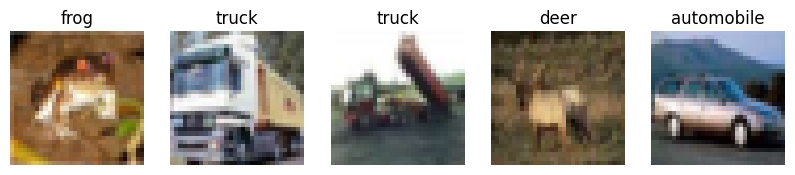

In [9]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Visualize some sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

## Designing the CNN Architecture

We'll build a simple CNN with:
- **Convolutional Layers**: Extract features using 3x3 filters with ReLU activation
- **MaxPooling Layers**: Reduce spatial dimensions to decrease computation and prevent overfitting
- **Dropout**: Prevent overfitting by randomly dropping neurons during training
- **Dense Layers**: Perform classification with a softmax output for 10 classes

In [10]:
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and summarize the model
model = create_cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Training the CNN

We'll train the model for 50 epochs with a batch size of 64, using 20% of the training data for validation. We'll also implement early stopping to prevent overfitting.

In [11]:
# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4044 - loss: 1.9249 - val_accuracy: 0.6080 - val_loss: 1.0966
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6182 - loss: 1.0758 - val_accuracy: 0.6746 - val_loss: 0.9355
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6830 - loss: 0.8991 - val_accuracy: 0.6692 - val_loss: 0.9701
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7116 - loss: 0.8122 - val_accuracy: 0.7228 - val_loss: 0.8003
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7390 - loss: 0.7377 - val_accuracy: 0.7407 - val_loss: 0.7655
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7637 - loss: 0.6649 - val_accuracy: 0.7331 - val_loss: 0.7536
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7865 - loss: 0.6052 - val_accuracy: 0.7774 - val_loss: 0.6501
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8038 - loss: 0.5552 - val_accuracy:

## Evaluating the Model

We'll evaluate the model on the test set and visualize the training and validation accuracy/loss curves to assess performance.

Test accuracy: 0.7861
Test loss: 0.6519


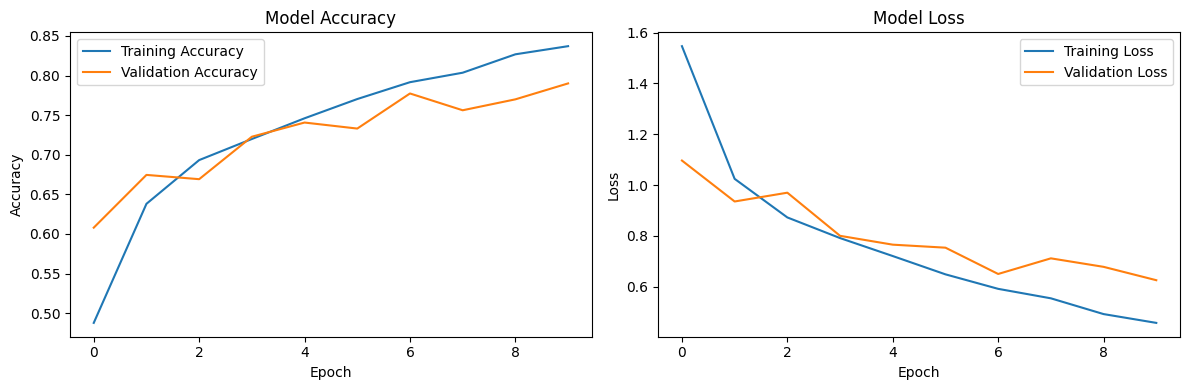

In [12]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('cnn_training_history.png')

## Visualizing Predictions

Let's make predictions on the test set and visualize some examples to see how the model performs.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


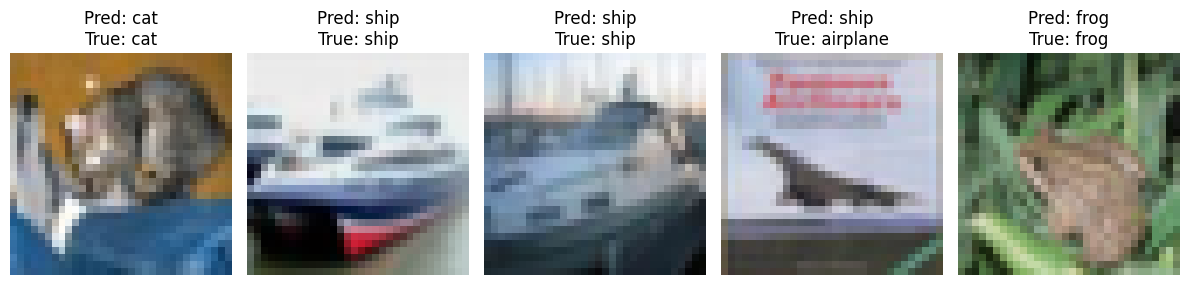

In [13]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualize some predictions
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Explanation

- **Dataset**: CIFAR-10 contains 60,000 32x32 RGB images across 10 classes. We normalized pixel values and used one-hot encoding for labels.
- **Model Architecture**: The CNN has two convolutional blocks with 32 and 64 filters, respectively, followed by max-pooling and dropout. The flattened features are passed to dense layers for classification.
- **Training**: Used Adam optimizer, categorical crossentropy loss, and early stopping to prevent overfitting.
- **Evaluation**: Assessed performance with test accuracy/loss and visualized training history to check for overfitting.
- **Predictions**: Visualized sample predictions to qualitatively evaluate the model.

This is a basic CNN for CIFAR-10. To improve performance, consider:
- Data augmentation (e.g., random flips, rotations)
- Deeper architectures (e.g., ResNet, VGG)
- Hyperparameter tuning (learning rate, number of filters)
- Transfer learning with pre-trained models